<a href="https://colab.research.google.com/github/Opiano1/FinHack/blob/master/FabiyiOpeyemi_gmail_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PAYLATER LOAN PRE-DILIQUENCY MODEL

## Introduction
Paylater is a FinTech company that offers soft loans to borrowers.its Data Science interns to build a model that predits if a client will default or payback the loan.

## Data Gathering

In [0]:
# import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (11.0, 7.0)
import seaborn as sns
sns.set_style('whitegrid')

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

pd.set_option('mode.chained_assignment', None)

    100% |████████████████████████████████| 993kB 16.1MB/s 


Get Data

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

url = 'https://drive.google.com/open?id=1zBsHdKbKekqM9g-iLK-Qm44MkLczbwyd'
url_id = url.split('=')[1]

downloaded = drive.CreateFile({'id':url_id}) 
downloaded.GetContentFile('paylaterloan.csv')  
loan = pd.read_csv('paylaterloan.csv')

## Data Accessing
Access the data for quality and tidyness.

### Head

In [0]:
# first five rows
loan_df = loan.copy()
loan_df.head()

,clientId,clientIncome,incomeVerified,clientAge,clientGender,clientMaritalStatus,clientLoanPurpose,clientResidentialStauts,clientState,clientTimeAtEmployer,...,paidAt,loanAmount,interestRate,loanTerm,max_amount_taken,max_tenor_taken,firstPaymentDefault,firstPaymentRatio,firstDueDate,loanDefault
0,755398623,52500.0,FALSE,29,FEMALE,Single,business,Rented,KANO,7,...,2018-09-04 11:54:00 UTC,16000,20.0,60,1,1,0,0.0,2018-08-13 12:00:00 UTC,0
1,915689736,52500.0,FALSE,25,MALE,Single,business,Rented,LAGOS,21,...,2018-09-06 04:44:04 UTC,14500,15.0,60,0,1,0,0.0,2018-09-21 12:00:00 UTC,0
2,292629156,35000.0,FALSE,32,MALE,Single,education,Rented,ANAMBRA,29,...,Null,19500,15.0,60,0,1,1,0.0,2018-09-24 12:00:00 UTC,1
3,671710636,35000.0,FALSE,28,FEMALE,Married,business,Own Residence,OSUN,36+,...,2018-07-10 11:23:31 UTC,19500,15.0,60,1,1,0,0.0,2018-07-19 12:00:00 UTC,0
4,367769827,35000.0,FALSE,34,MALE,Married,medical,Rented,ONDO,36+,...,2018-08-09 06:05:37 UTC,17500,12.5,60,1,1,1,0.0,2018-07-02 12:00:00 UTC,1


### Shape of Dataframe

In [0]:
# shape
print(f'There are {loan_df.shape[0]} observations and {loan_df.shape[1]} fields in the dataframe')

There are 159596 observations and 31 fields in the dataframe


### Number Missing Values

In [0]:
# missing values
loan_df.isnull().sum()

clientId                     0
clientIncome                 0
incomeVerified               0
clientAge                    0
clientGender                 0
clientMaritalStatus          0
clientLoanPurpose            0
clientResidentialStauts      0
clientState                  0
clientTimeAtEmployer         0
clientNumberPhoneContacts    0
clientAvgCallsPerDay         0
loanId                       0
loanType                     0
loanNumber                   0
applicationDate              0
approvalDate                 0
declinedDate                 0
disbursementDate             0
payout_status                0
dueDate                      0
paidAt                       0
loanAmount                   0
interestRate                 0
loanTerm                     0
max_amount_taken             0
max_tenor_taken              0
firstPaymentDefault          0
firstPaymentRatio            0
firstDueDate                 0
loanDefault                  0
dtype: int64

### Client State

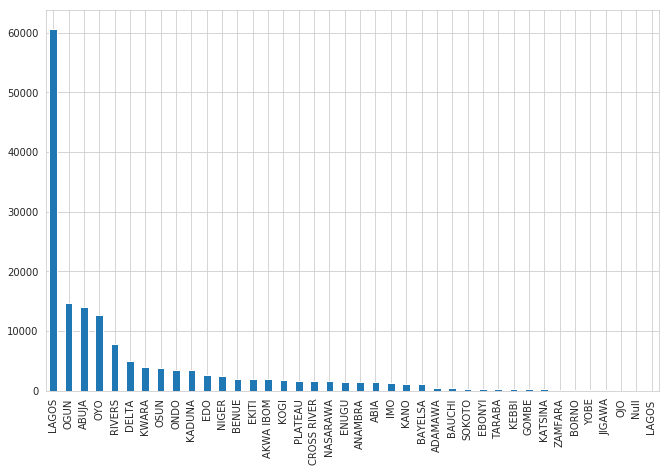

In [0]:
loan_df.clientState.value_counts().plot.bar();

Notes:
>- Null values
- Lagos is not unique
- Ojo is in in lagos

### Client Residential Status

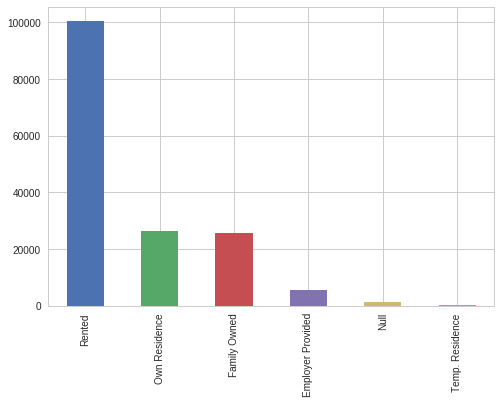

In [0]:
loan_df.clientResidentialStauts.value_counts().plot.bar();

Notes:
>- Column not named properly
- Null values

### Client Time At Employer

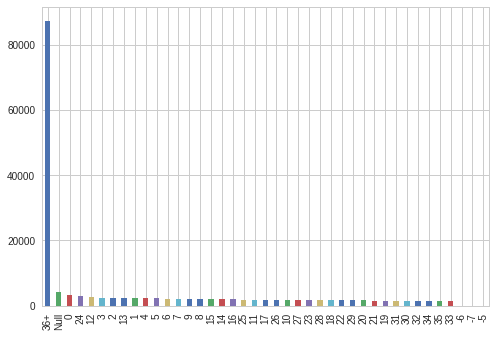

In [0]:
loan.clientTimeAtEmployer.value_counts().plot.bar();

Notes:
>- Null values
- Negative values
- Non-numeric characters

### Income Verified

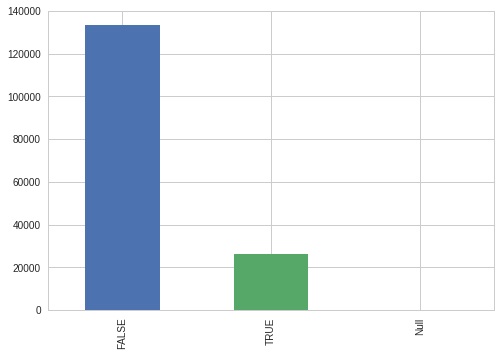

In [0]:
loan_df.incomeVerified.value_counts().plot.bar();

Notes:
>- Null values

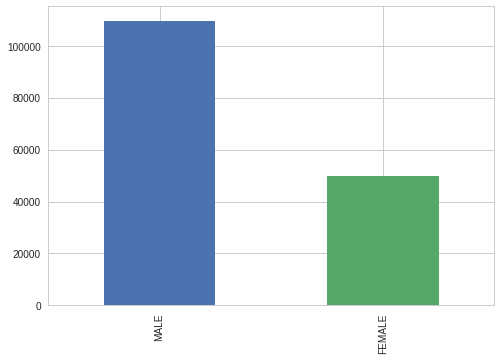

In [0]:
loan_df.clientGender.value_counts().plot.bar();

### Client Marital Status

In [0]:
loan_df.clientMaritalStatus.value_counts()

Married      85492
Single       71361
Separated     1795
Widowed        939
Null             6
Divorced         3
Name: clientMaritalStatus, dtype: int64

Notes:
>- Null Values

### Client Avg Calls Per Day

In [0]:
loan_df[loan_df.clientAvgCallsPerDay.str.contains('Null')]['clientAvgCallsPerDay'].count()

2687

Notes:
>- 2687 "Null" values

In [0]:
loan_df.dtypes

clientId                       int64
clientIncome                 float64
incomeVerified                object
clientAge                      int64
clientGender                  object
clientMaritalStatus           object
clientLoanPurpose             object
clientResidentialStauts       object
clientState                   object
clientTimeAtEmployer          object
clientNumberPhoneContacts     object
clientAvgCallsPerDay          object
loanId                        object
loanType                      object
loanNumber                     int64
applicationDate               object
approvalDate                  object
declinedDate                  object
disbursementDate              object
payout_status                 object
dueDate                       object
paidAt                        object
loanAmount                     int64
interestRate                 float64
loanTerm                       int64
max_amount_taken               int64
max_tenor_taken                int64
f

Note:
>- Wrong datatypes

### `Action Points`

#### Qaulity Data
> 1. Fix all Null values in client state.
2. Make the state value Lagos unique.
3. Replace the value "Ojo" with lagos. Ojo is a local government in Lagos.
4. Rename the column `clientResidentialStauts`.
5. Fix all Null values in `clientResidentialStauts`.
6. Fix all Null values in `clientTimeAtEmployer`.
7. Fix all null and negative values in `clientTimeAtEmployer`
8. Remove all non-numeric characters in `clientTimeAtEmployer`.
9. Fix all Null values in `clientAvgCallsPerDay`.
10. Fix all Null Values in `clientMaritalStatus`.
11. The terms separated and divorced are a bit confusing. I will create a new column, `isMarried`, to signify clients with and without partners `{"Married":1, "Not Married":0}`
12. I will use Binary Encoding to encode client gender `{Male:1, Female:0}`.
13. Change the income verified column to binary

#### Tidy Data
>14. Fix all wrong datatypes (datetime, category, numeric, etc.)

## Data Cleaning
It is always advisable to make a copy of your dataframe before performing any action on it. This helps to refer to previous versions of the dataframe.

In [0]:
# copy dataframe
loan_clean = loan_df.copy()

### Client State

I will go on to strip trailing white spaces from the values (this should solve the problem of having the state `Lagos` as two different values). Since Ojo is a local government in Lagos it will be replaced with the value `Lagos`.

In [0]:
# rows will null value
null_state = loan_clean[loan_clean.clientState.isin(['Null'])]
# drop the selected rows
loan_clean.drop(null_state.index, inplace=True)
# remove trailing white spaces
# replace "OJO" with "LAGOS"
loan_clean['clientState'] = loan_clean.clientState.str.strip().replace('OJO', 'LAGOS')

### Client Residential Status
I will rename the column `clientResidentialStauts` to `clientResidentialStatus`. Drop rows will null values.

In [0]:
# rename column
loan_clean.columns = loan_clean.columns.str.replace('clientResidentialStauts', 'clientResidentialStatus')
#confirm that that column has been renamed
assert loan_clean.columns.contains('clientResidentialStauts') == False
#select rows will null values
null_resident = loan_clean[loan_clean.clientResidentialStatus.isin(['Null'])]
# drop the selected rows
loan_clean.drop(null_resident.index, inplace=True)

### Client Time At Employer
For the duration of time clients have spent with their employee, I will I will drop the rows will null values, I will also do the same for all negative values. It seems that negative values indicate that the client has been unemployed for a while or the value was wrongly inputed. And lastly, I will remove all non-numeric characters.

In [0]:
# rows to drop
cte_rows_to_drop = loan_clean[loan_clean.clientTimeAtEmployer.isin(['Null', '-6', '-7', '-5'])]
# drop rows
loan_clean.drop(cte_rows_to_drop.index, inplace=True)
# replace 36+ with 36
to_replace = {'36+': '36'}
# perform replacement
loan_clean.clientTimeAtEmployer.replace(to_replace, inplace=True)

### Client Avg Calls PerDay
I will just drop this column

In [0]:
loan_clean.drop(['clientAvgCallsPerDay'], axis=1, inplace=True)
# replace nulls with 0
#loan_clean.clientAvgCallsPerDay.replace('Null', np.nan, inplace=True)
# confirm changes
#assert loan_clean.clientAvgCallsPerDay.isin(['Null']).any() == False

### Client Marital Status
Drop rows with null values.

In [0]:
# null marital status
null_m_status = loan_clean[loan_clean.clientMaritalStatus.isin(['Null'])]
# drop null marital status
loan_clean.drop(null_m_status.index, inplace=True)

#replaces null values
#loan_clean.clientMaritalStatus.replace('Null', loan_clean.clientMaritalStatus.mode()[0], inplace=True)
#assert loan_clean.clientMaritalStatus.isin(['Null']).any() == False
#extract new feature, isMarried
#loan_clean['isMarried'] = np.where(loan_clean['clientMaritalStatus'].str.contains('Married'), 1, 0)
#loan_clean.drop(['clientMaritalStatus'], axis=1, inplace=True)

### Client Gender
I will use Binary Encoding to encode client gender `{Male:1, Female:0}`.

In [0]:
loan_clean['clientGender'] = np.where(loan_clean['clientGender'].str.contains('FEMALE'), 0, 1,)

### Income Verified
Change the income verified column to binary

In [0]:
# Null values
null_iv = loan_clean[loan_clean.incomeVerified.isin(['Null'])]
# drop nulls
loan_clean.drop(null_iv.index, inplace=True)
# Binary encode incomeVeried
loan_clean['incomeVerified'] = np.where(loan_clean['incomeVerified'].str.contains('TRUE'), 1, 0)

### Futher data cleaning

declinedDate

In [0]:
# replace null values with np.nan
loan_clean.declinedDate.replace('Null', np.nan, inplace=True)

In [0]:
# declined loans
mask = loan_clean.declinedDate.notnull()
declined_loans = loan_clean[mask]
declined_loans[['declinedDate', 'loanDefault']]

,declinedDate,loanDefault
5936,5/7/2018,1
7063,4/18/2018,1
17321,4/19/2018,1
23736,9/5/2018,1
28414,11/1/2018,1
39185,4/18/2018,1
52882,11/1/2018,1


For clients whose loans were declined, we see here that they defaulted in loan payment. This is not true, since they never got the loan. This information is misleading. I will go on to leave out the affected rows from the cleaned dataframe.

In [0]:
# filter out rows where dateDeclined is not null
loan_clean = loan_clean.loc[~mask]
# confirm
assert loan_clean.declinedDate.notnull().all() == False

I will now go on to drop the following columns
- declinedDate -- it is no longer of any use.
- dueDate and paidDate 

In [0]:
#drop columns
loan_clean.drop(['dueDate', 'paidAt', 'declinedDate', 'loanId', 'loanType',
               'disbursementDate', 'payout_status',
                'firstDueDate'], axis= 1, inplace=True)

In [0]:
# create dummy variables
loan_clean = pd.get_dummies(loan_clean, columns=['clientState'], prefix=['stateIs'])

In [0]:
new_df = loan_clean.copy()

Create new column `monthlyPyament`

In [0]:
loan_amount = new_df.loanAmount.values
interest_rate = new_df.interestRate.values/100
interest = loan_amount*interest_rate
payback_amount = loan_amount + interest

In [0]:
# convert loan terms to days
test = []
for item in new_df.loanTerm:
    if item == 60:
        test.append(item/2)
    elif item ==90:
        test.append(item/3)
    else:
        test.append(item/6)

In [0]:
#new column monthPayment
new_df['monthlyPayment']= payback_amount/test

In [0]:
#cat_cols = ['clientGender', 'clientGender', 'clientLoanPurpose', 'loanTerm', 'loanDefault', 'firstPaymentDefault']
#for col in cat_cols:
#    new_df[col] = new_df[col].astype('category'
# change to numeric
new_df.clientTimeAtEmployer = pd.to_numeric(new_df.clientTimeAtEmployer)

In [0]:
# create dummy variables
new_df = pd.get_dummies(new_df, columns=['clientLoanPurpose'], prefix=['purpose'])
new_df = pd.get_dummies(new_df, columns=['loanTerm'], prefix=['term'])
new_df = pd.get_dummies(new_df, columns=['clientMaritalStatus'], prefix=['MaritalStatusIs'])
new_df = pd.get_dummies(new_df, columns=['clientResidentialStatus'], prefix=['RS'])

In [0]:
#to_cat = ['purpose_business', 'purpose_education', 'purpose_house', 'purpose_medical', 'purpose_other']
#for col in to_cat:
#    new_df[col] = new_df[col].astype('category')

In [0]:
for col in new_df.columns:
    if new_df[col].astype(str).isin(['Null']).any() == True:
        new_df[col].replace('Null', 0, inplace=True)
        print(col)

clientNumberPhoneContacts


## Is the dataset balanced?

In [0]:
defualt  = new_df.loanDefault.value_counts()[1]/len(new_df) * 100
non_default = new_df.loanDefault.value_counts()[0]/len(new_df) * 100
print('Bad loans: %.2f%%' % (defualt))
print('Good loans: %.2f%%' % (non_default))                                                  

Bad loans: 27.81%
Good loans: 72.19%


This implies that there is 1 bad loan (default) for every 3 good loans (non default). This defintely is not too good for the company. And with approximately 72% of this dataset representing good loans., it means this dataset is inbalanced. I will balance the data by over sampling the under represented class.

In [0]:
# drop columns
new_df.drop(['clientId',  'clientNumberPhoneContacts', 'applicationDate', 'approvalDate'], axis =1, inplace=True)

Our features of interest should have a correlation of atleast .2 with the response variable, loanDefault.

In [0]:
# correlation
cast = new_df.copy()
for col in cast.columns:
    cast[col] = pd.to_numeric(cast[col])   
highly_correlated_features = new_df.columns[cast.corr()['loanDefault'].abs() >= .2]

In [0]:
imp_features = new_df[highly_correlated_features]

In [0]:
imp_features.head()

,firstPaymentDefault,firstPaymentRatio,loanDefault
0,0,0.0,0
1,0,0.0,0
2,1,0.0,1
3,0,0.0,0
4,1,0.0,1


Only two variable have a correlation of atleast .2 with the response variable.

## Split the dataset into features and lables

In [0]:
#labels
labels = np.array(imp_features['loanDefault'])
#features
features = np.array(imp_features.drop(['loanDefault'], axis=1))

## Random Forrest Classification

In [0]:
# import packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

Split dataset into training and validation set.

In [0]:
train_features, val_features, train_labels, val_labels = train_test_split(features, labels, test_size=0.2, random_state=0)

Split traning set into training and testing set.

In [0]:
train_features, test_features, train_labels, test_labels = train_test_split(train_features, train_labels, test_size=0.25, random_state=42)

### Over sampling

In [0]:
oversampler=SMOTE(random_state=56)
os_features,os_labels=oversampler.fit_sample(train_features,train_labels)

In [0]:
# fit the model
classifier = RandomForestClassifier(n_estimators=500,
                                    random_state=1000)
#train model
classifier.fit(os_features, os_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=1000, verbose=0,
            warm_start=False)

In [0]:
# make prediction
y_pred = classifier.predict(test_features)

In [0]:
#metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy=accuracy_score(test_labels,y_pred)
print(accuracy)
print('===================================')
print(classification_report(test_labels,y_pred))
print('===================================')
c_metric=confusion_matrix(test_labels,y_pred)
pd.crosstab(test_labels, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

0.8490180828310324
              precision    recall  f1-score   support

           0       0.90      0.89      0.89     22297
           1       0.72      0.75      0.73      8561

   micro avg       0.85      0.85      0.85     30858
   macro avg       0.81      0.82      0.81     30858
weighted avg       0.85      0.85      0.85     30858



Predicted Result,0,1
Actual Result,,
0,19739,2558
1,2101,6460


In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

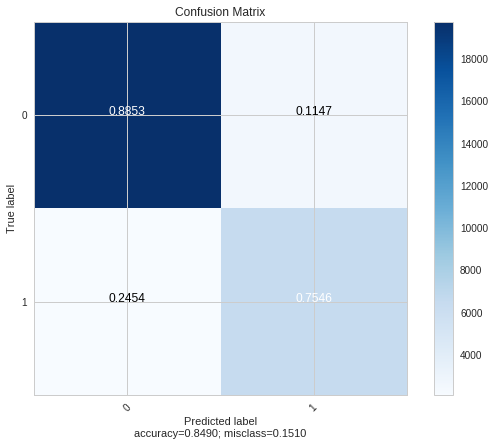

In [0]:
plot_confusion_matrix(cm           = c_metric, 
                      normalize    = True,
                      target_names = ['0', '1'],
                      title        = "Confusion Matrix")

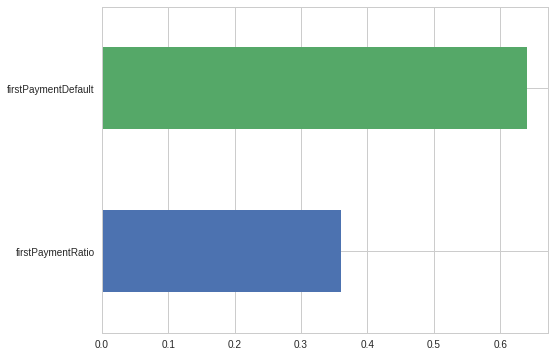

In [0]:
# feature importance
feature_imp = pd.Series(classifier.feature_importances_, index=imp_features.drop(['loanDefault'], axis=1).columns).sort_values()

plt.figure(figsize=(8, 6))
feature_imp.plot.barh();

## Validation

In [0]:
# make prediction
val_pred = classifier.predict(val_features)

#metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy=accuracy_score(val_labels,val_pred)
print(accuracy)
print('===================================')
print(classification_report(val_labels,val_pred))
print('===================================')
c_metric=confusion_matrix(val_labels,val_pred)
pd.crosstab(test_labels, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

0.8471709119191133
              precision    recall  f1-score   support

           0       0.90      0.89      0.89     22374
           1       0.71      0.75      0.73      8484

   micro avg       0.85      0.85      0.85     30858
   macro avg       0.81      0.82      0.81     30858
weighted avg       0.85      0.85      0.85     30858



Predicted Result,0,1
Actual Result,,
0,19739,2558
1,2101,6460


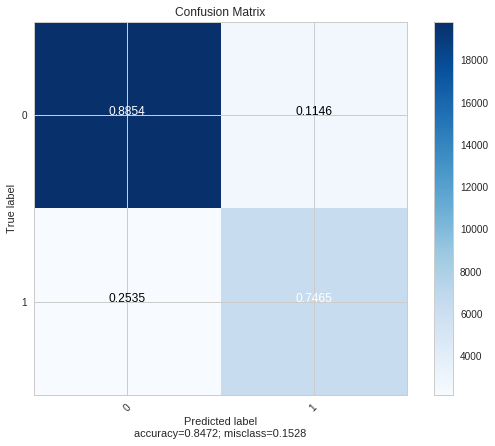

In [0]:
plot_confusion_matrix(cm           = c_metric, 
                      normalize    = True,
                      target_names = ['0', '1'],
                      title        = "Confusion Matrix")

The model performs quite well. It predicted 74.65% of defaulted loans correctly. This value was 75.46% during the traing.

## Artificial Neural Network

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = features
X = sc.fit_transform(X)

from keras import Sequential
from keras.layers import Dense

classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=2))

#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))

#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

#Fitting the data to the training dataset
classifier.fit(os_features,os_labels, batch_size=10, epochs=100)

Epoch 1/100
133434/133434 [==============================] - 13s 98us/step - loss: 0.4423 - acc: 0.8123
Epoch 2/100
133434/133434 [==============================] - 13s 95us/step - loss: 0.4274 - acc: 0.8153
Epoch 3/100
133434/133434 [==============================] - 13s 95us/step - loss: 0.4271 - acc: 0.8153
Epoch 4/100
133434/133434 [==============================] - 13s 96us/step - loss: 0.4270 - acc: 0.8153
Epoch 5/100
133434/133434 [==============================] - 13s 96us/step - loss: 0.4270 - acc: 0.8153
Epoch 6/100
133434/133434 [==============================] - 13s 96us/step - loss: 0.4269 - acc: 0.8153
Epoch 7/100
133434/133434 [==============================] - 13s 95us/step - loss: 0.4269 - acc: 0.8153
Epoch 8/100
133434/133434 [==============================] - 13s 96us/step - loss: 0.4269 - acc: 0.8153
Epoch 9/100
133434/133434 [==============================] - 13s 96us/step - loss: 0.4269 - acc: 0.8153
Epoch 10/100
133434/133434 [==============================] - 13

Loss and accuracy of the model

In [0]:
# evalute model
eval_model = classifier.evaluate(os_features, os_labels)
eval_model

133434/133434 [==============================] - 2s 16us/step


[0.4270320574194182, 0.815294452691794]

In [0]:
prediction = classifier.predict(test_features)
prediction = (prediction >0.5)

In [0]:
#metrics
accuracy=accuracy_score(test_labels,prediction)
print(accuracy)
print('===================================')
print(classification_report(test_labels,prediction))
print('===================================')
c_metric=confusion_matrix(test_labels,prediction)
c_metric

0.8490180828310324
              precision    recall  f1-score   support

           0       0.90      0.89      0.89     22297
           1       0.72      0.75      0.73      8561

   micro avg       0.85      0.85      0.85     30858
   macro avg       0.81      0.82      0.81     30858
weighted avg       0.85      0.85      0.85     30858



array([[19739,  2558],
       [ 2101,  6460]])

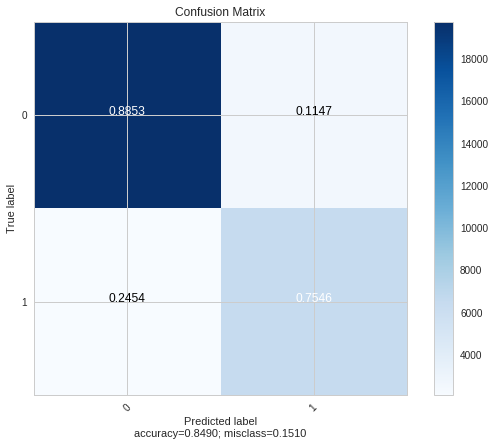

In [0]:
plot_confusion_matrix(cm           = c_metric, 
                      normalize    = True,
                      target_names = ['0', '1'],
                      title        = "Confusion Matrix")

## Validation

In [0]:
# make prediction
val_prediction = classifier.predict(val_features)
val_prediction = (val_prediction> 0.5)
#metrics
accuracy=accuracy_score(val_labels,val_prediction)
print(accuracy)
print('===================================')
print(classification_report(val_labels,val_prediction))
print('===================================')
c_metric=confusion_matrix(val_labels,val_prediction)
c_metric

0.8471709119191133
              precision    recall  f1-score   support

           0       0.90      0.89      0.89     22374
           1       0.71      0.75      0.73      8484

   micro avg       0.85      0.85      0.85     30858
   macro avg       0.81      0.82      0.81     30858
weighted avg       0.85      0.85      0.85     30858



array([[19809,  2565],
       [ 2151,  6333]])

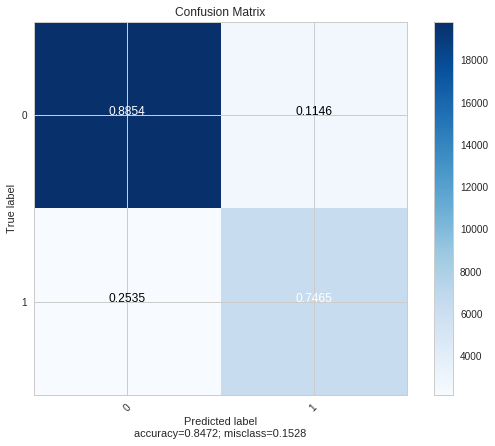

In [0]:
plot_confusion_matrix(cm           = c_metric, 
                      normalize    = True,
                      target_names = ['0', '1'],
                      title        = "Confusion Matrix")

The two models did not outperform each other. This could be a problem of overfitting (very common with oversampling).